# Image Classification


## Table of Contents

1. [Introduction](#1--introduction)
2. [Dataset Loading](#2--dataset-loading)
3. [Data Preprocessing](#3--data-preprocessing)
    - [Image Flattening](#3.1--image-flattening)
    - [Image Scaling](#3.2--image-scaling)
4. [Data Splitting](#4--data-splitting)
5. [Model Training](#5--model-training)
6. [Model Predictions](#6--model-predictions)
7. [Model Evaluations](#7--model-evaluations)
    - [Model Comparisons](#7.1--model-comparisons)
    - [Test Images Predictions](#7.2--test-images-predictions)

## 1- Introduction

This notebook focuses on classifying groups of images rather than segmenting a single image.  We will utilize the scikit-learn library's `digits` dataset, which includes:  
    - 8x8 grayscale images of handwritten digits (0 through 9).  
    - Each image represented as a flattened array of 64 features (pixel intensity values).  
- Some key details about the dataset:  
    - Contains 1,797 samples.  
    - Each sample is labeled with the corresponding digit it represents.  
- The dataset is widely used for classification tasks and serves as an excellent benchmark for evaluating machine learning models.  

---

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## 2- Dataset Loading

In [38]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

The default dataset description reflects exactly what we already know about the dataset.

Let's try then to do some initial data exploration to see if we can get more information out of it before doing any classification.

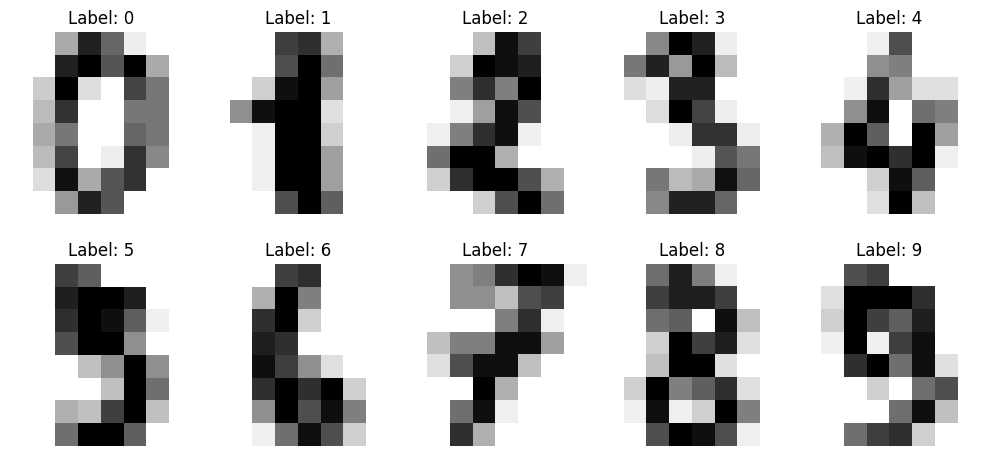

Dataset shape: (1797, 8, 8)
Number of samples per class:
Digit 0: 178 samples
Digit 1: 182 samples
Digit 2: 177 samples
Digit 3: 183 samples
Digit 4: 181 samples
Digit 5: 182 samples
Digit 6: 181 samples
Digit 7: 179 samples
Digit 8: 174 samples
Digit 9: 180 samples


In [39]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f"Dataset shape: {digits.images.shape}")
print(f"Number of samples per class:")
for i in range(10):
    print(f"Digit {i}: {(digits.target == i).sum()} samples")

## 3- Data Preprocessing

### 3.1- Image Flattening

In [40]:
flattened_digits = digits.images.reshape((digits.images.shape[0], -1))

flattened_digits.shape

(1797, 64)

### 3.2- Image Scaling

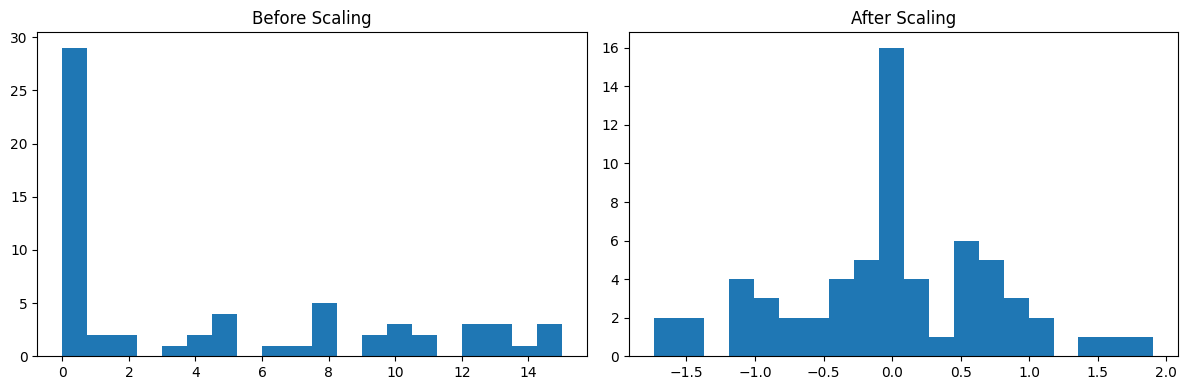

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
digits_scaled = scaler.fit_transform(flattened_digits)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(flattened_digits[0], bins=20)
axes[0].set_title("Before Scaling")
axes[1].hist(digits_scaled[0], bins=20)
axes[1].set_title("After Scaling")
plt.tight_layout()
plt.show()

## 4- Data Splitting

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits_scaled, digits.target, test_size=0.2, random_state=42
)

## 5- Model Training

We can try here different models besides just the standard **SVM Model** in order to see what each one will yield as results.

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time

models = {
    'SVM (Linear)': SVC(kernel="linear", C=1.0, random_state=42),
    'SVM (RBF)': SVC(kernel="rbf", gamma='scale', C=1.0, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results = {'Model': [], 'Model Name':[], 'Accuracy': [], 'F1-Score':[], 'Precision':[], 'Training Time': []}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    results['Model Name'].append(name)
    results['Model'].append(model)
    results['Training Time'].append(train_time)

## 6- Model Predicions

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
for model in results['Model']:
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    results['Accuracy'].append(accuracy)
    results['F1-Score'].append(f1)
    results['Precision'].append(precision)

## 7- Evaluation

### 7.1- Model Comparisons

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

results_df = pd.DataFrame(results)

print("Model Performance Comparison:")
display(results_df)

Model Performance Comparison:


,Model,Model Name,Accuracy,F1-Score,Precision,Training Time
0,"SVC(kernel='linear', random_state=42)",SVM (Linear),0.975000,0.974957,0.975265,0.027839
1,SVC(random_state=42),SVM (RBF),0.980556,0.980520,0.980909,0.055850
2,"(DecisionTreeClassifier(max_features='sqrt', r...",Random Forest,0.972222,0.972229,0.972551,0.358808
3,KNeighborsClassifier(),KNN,0.975000,0.974780,0.975015,0.000707


We notice that overall, all the models perform remarkably well on the data with minimal errors on all metrics, and even their training time is optimal.

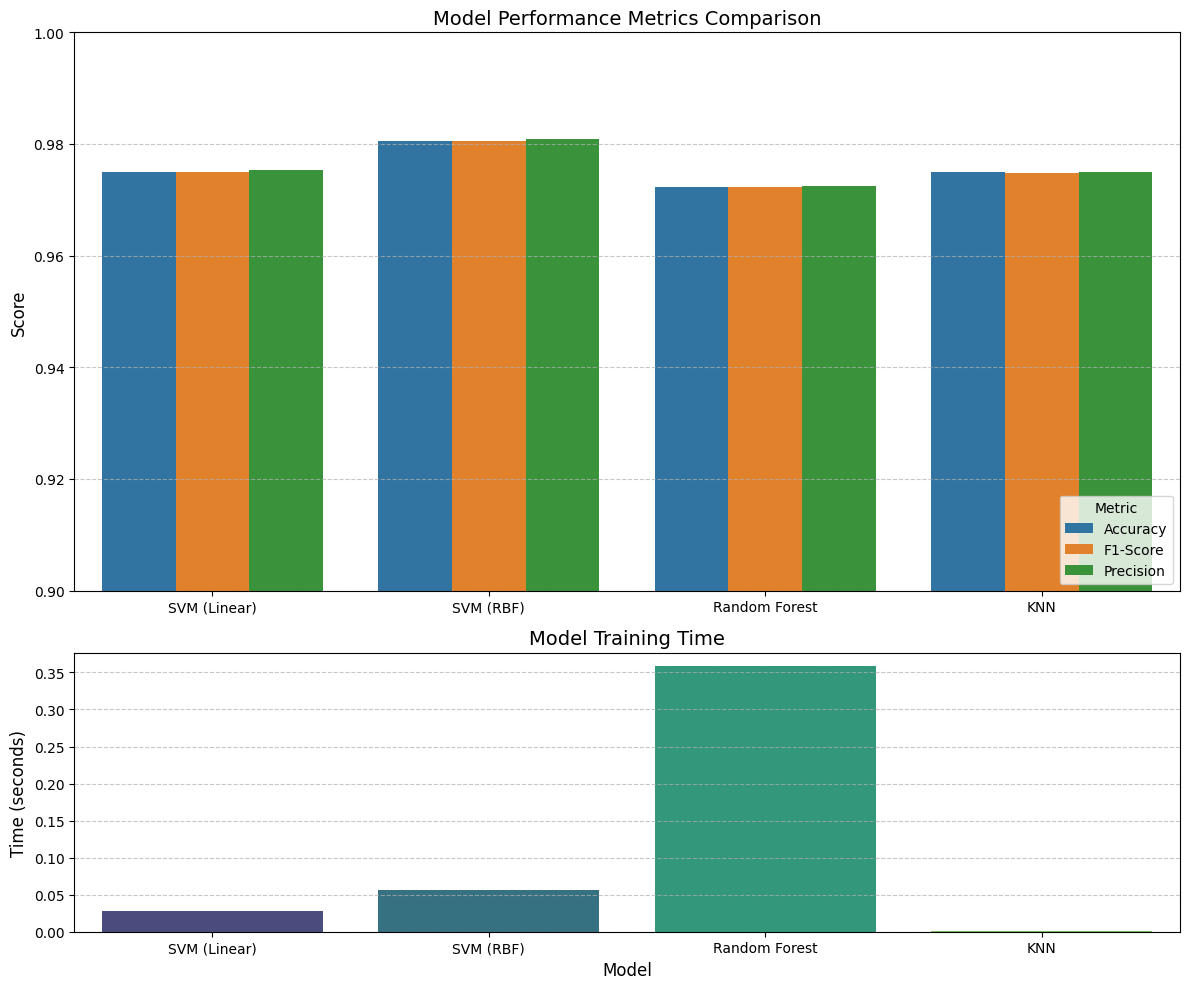

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1]})

metrics_df = pd.melt(results_df, 
                    id_vars=['Model Name'], 
                    value_vars=['Accuracy', 'F1-Score', 'Precision'],
                    var_name='Metric', value_name='Score')

sns.barplot(x='Model Name', y='Score', hue='Metric', data=metrics_df, ax=ax1)
ax1.set_title('Model Performance Metrics Comparison', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Score', fontsize=12)
ax1.set_ylim(0.9, 1.0) 
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title='Metric', loc='lower right')

sns.barplot(x='Model Name', y='Training Time', data=results_df, ax=ax2, hue='Model Name', palette='viridis', legend=False)
ax2.set_title('Model Training Time', fontsize=14)
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('Time (seconds)', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

Here, we observe more clearly that not all the models perform equally. Despite its high performance, `Random Forest` is comparatively slower and slightly less accurate than the others.

`KNN` achieves the fastest training time but falls slightly behind both `SVM` models in terms of performance metrics.

Let us further visualize the differences between these models using a `radar chart` to compare their metrics.

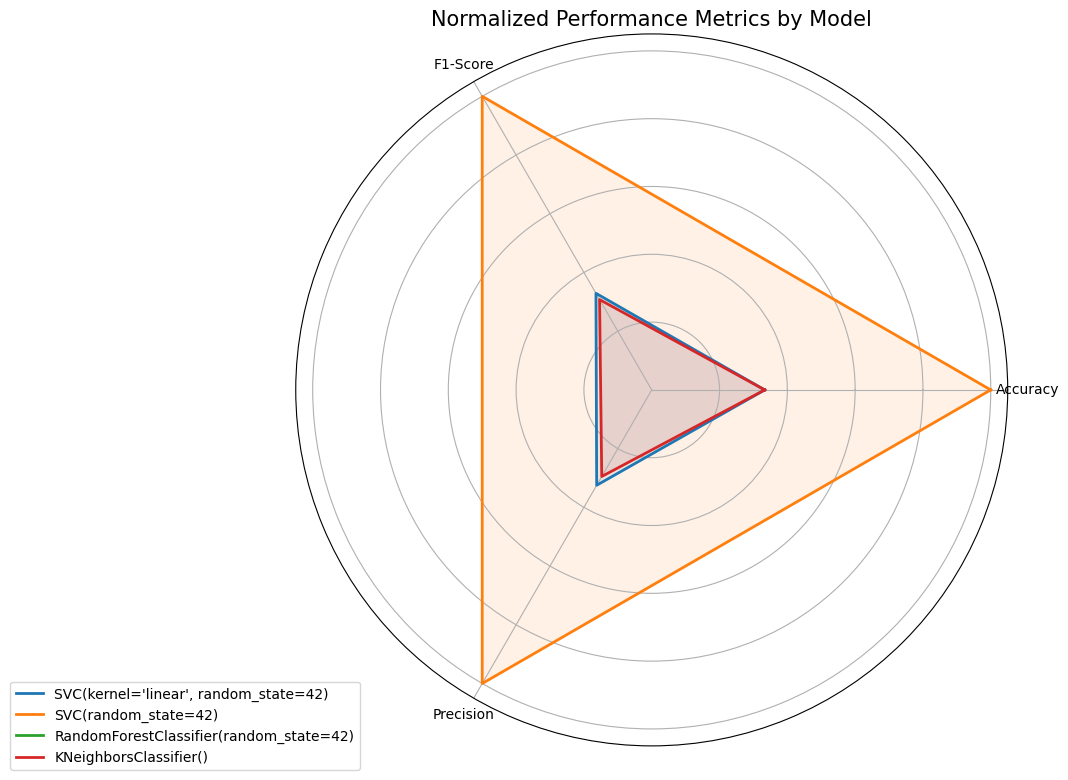

In [ ]:
metrics = ['Accuracy', 'F1-Score', 'Precision']
models = results_df['Model'].tolist()

normalized_metrics = results_df[metrics].copy()
for metric in metrics:
    min_val = normalized_metrics[metric].min()
    max_val = normalized_metrics[metric].max()
    if max_val > min_val:
        normalized_metrics[metric] = (normalized_metrics[metric] - min_val) / (max_val - min_val)
        
# Set up radar chart
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Number of variables
N = len(metrics)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  

# Plot each model
for i, model in enumerate(models):
    values = normalized_metrics.iloc[i].tolist()
    values += values[:1]  
    
    ax.plot(angles, values, linewidth=2, label=str(model))
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticklabels([])
ax.grid(True)
plt.title('Normalized Performance Metrics by Model', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

It is now clear that the best model for our case is the `SVM` with the `rbf` kernel. Despite being the most complex initialization, it delivers excellent results.

### 7.2- Test Images Predictions

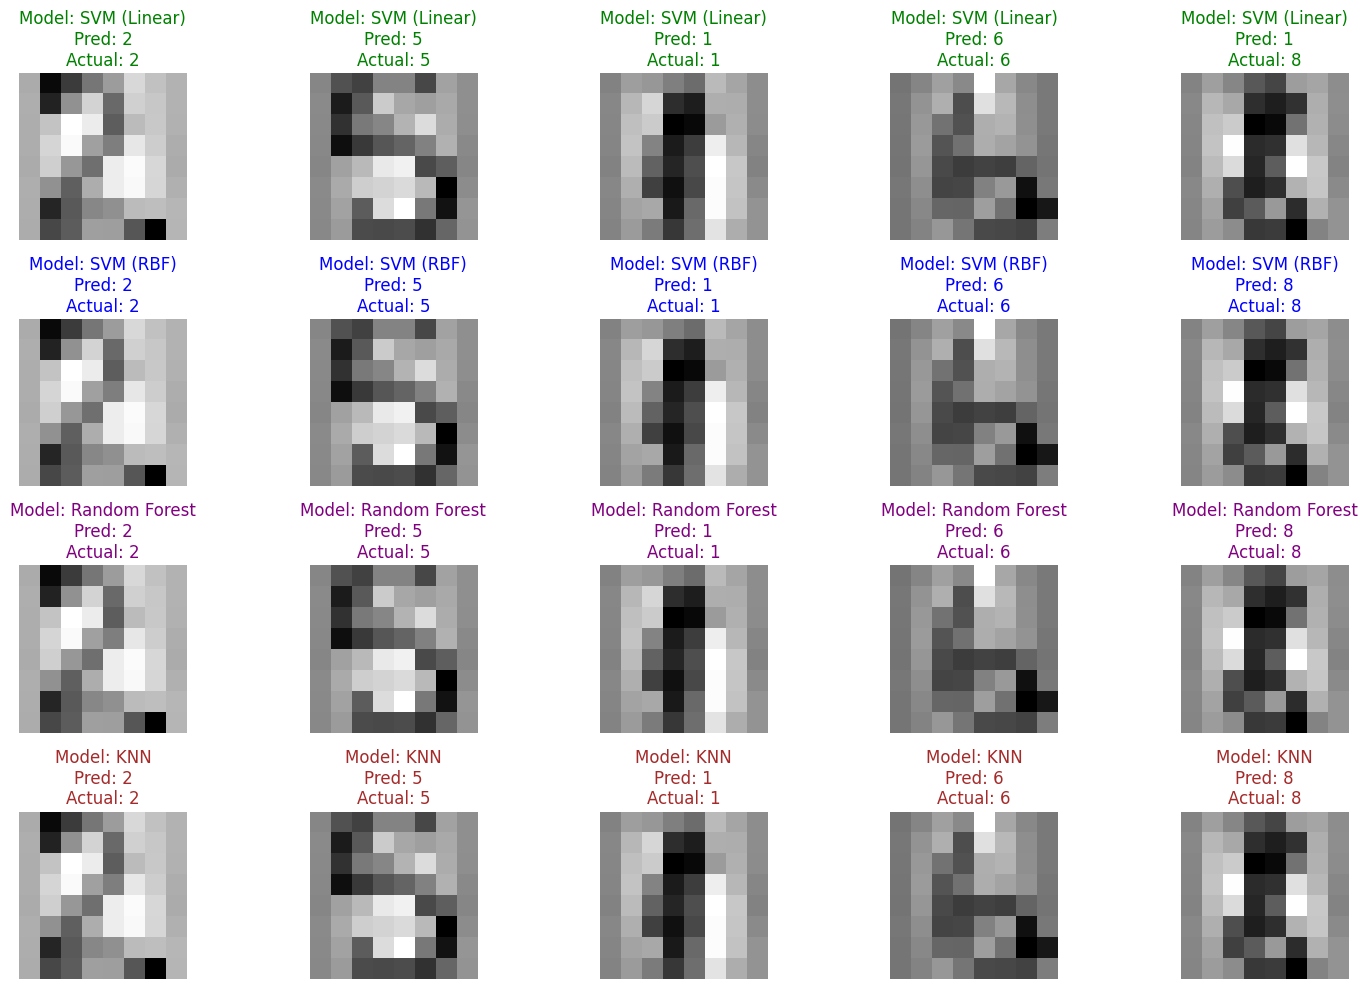

In [ ]:
colors = ['green', 'blue', 'purple', 'brown'] 

fig, axes = plt.subplots(len(models), 5, figsize=(15, 10))
axes = axes.ravel()

random_indices = np.random.choice(X_test.shape[0], 5, replace=False)
tests_x = X_test[random_indices]
tests_y = y_test[random_indices]

for model_idx, model in enumerate(models):
    row_color = colors[model_idx] 
    y_pred = model.predict(tests_x)
    for i in range(5):
        ax = axes[model_idx * 5 + i]
        ax.imshow(tests_x[i].reshape(8, 8), cmap='binary')
        
        ax.set_title(
            f"Model: {results['Model Name'][model_idx]}\nPred: {y_pred[i]}\nActual: {tests_y[i]}", color=row_color)
        ax.axis('off')

plt.tight_layout()
plt.show()

All of the utilized models predicted accurately over the random sample of test data.